In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Data preparation

In [14]:
## load dataset here
df = pd.read_csv("/content/drive/My Drive/Datasets/ticket_booking/ticket_booking.csv")
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [ ]:
df = df.drop("Unnamed: 0", axis=1)

In [ ]:
# Check how many rows contain missing values
df.isnull().any(axis=1).sum()

0

#EDA

1. Summary Statistics: Calculate the mean, median, and standard deviation for numerical features such as price, duration, and days_left.

In [ ]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


2. Distribution Analysis: Plot histograms or density plots to understand the distribution of features like price, duration, and days_left.


<ipython-input-15-dced4ac8be27>:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], shade=True)


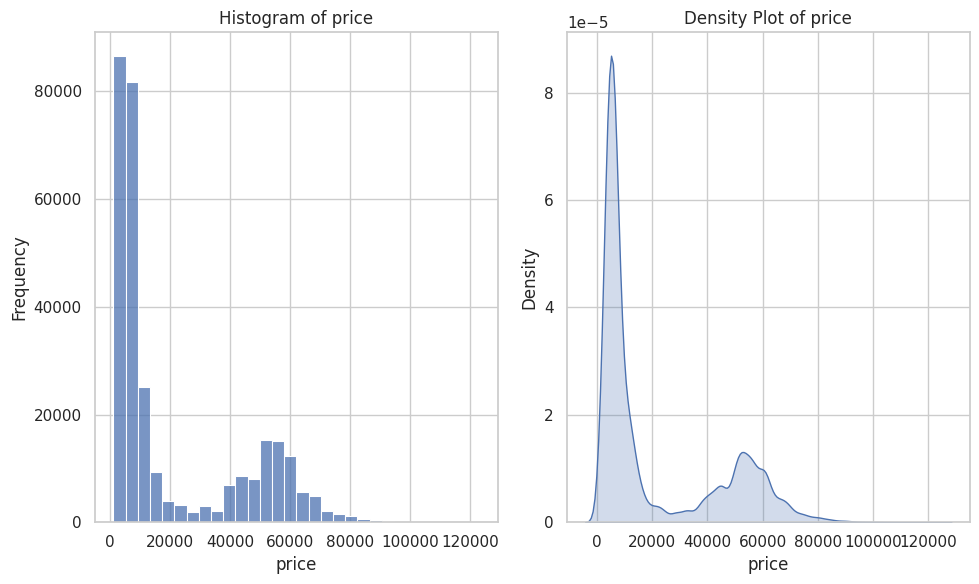

<ipython-input-15-dced4ac8be27>:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], shade=True)


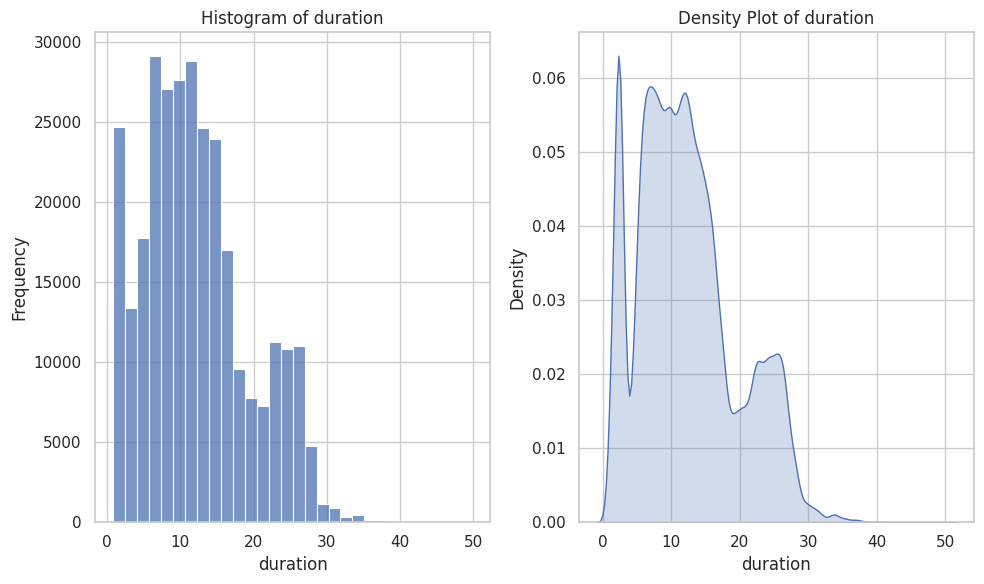

<ipython-input-15-dced4ac8be27>:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], shade=True)


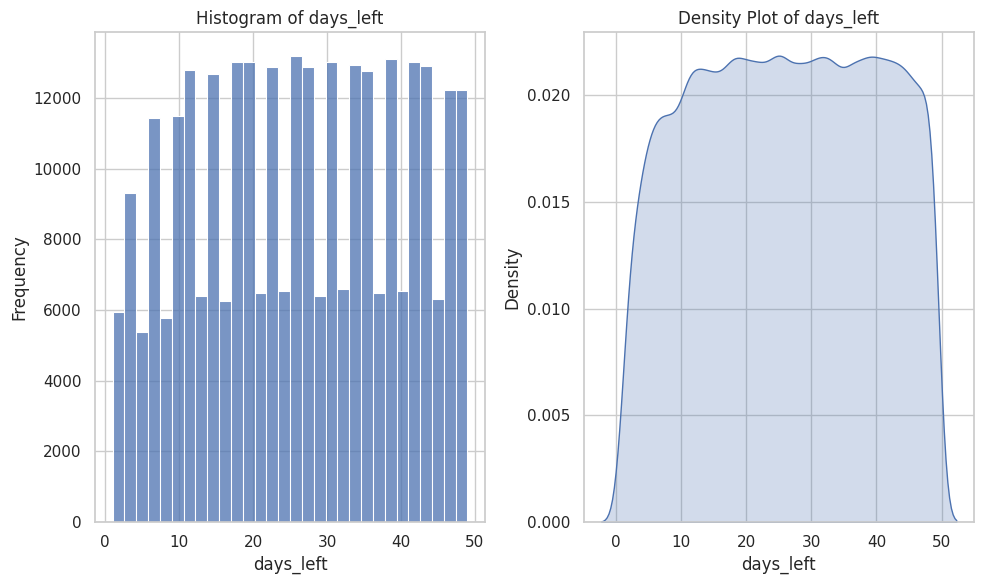

In [ ]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Define the numerical features
numerical_features = ['price', 'duration', 'days_left']

# Plot histograms and density plots
for feature in numerical_features:
    plt.figure(figsize=(10, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], bins=30, kde=False)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    # Density plot
    plt.subplot(1, 2, 2)
    sns.kdeplot(df[feature], shade=True)
    plt.title(f'Density Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')

    plt.tight_layout()
    plt.show()

3. Categorical Analysis: Count the occurrences of each category in features like airline, source_city, destination_city, class, and stops.

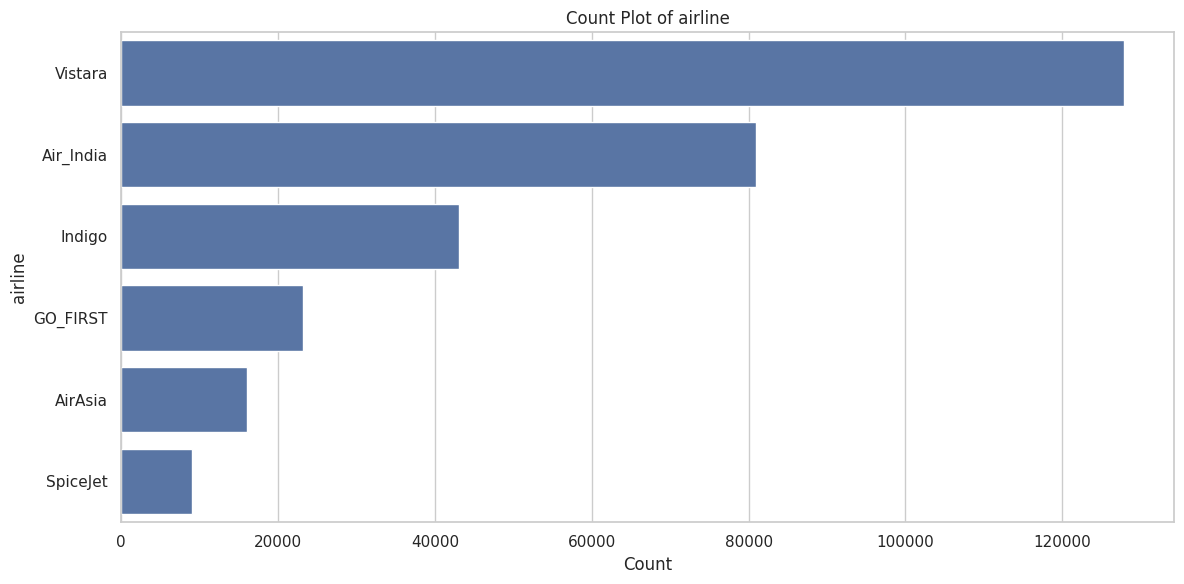

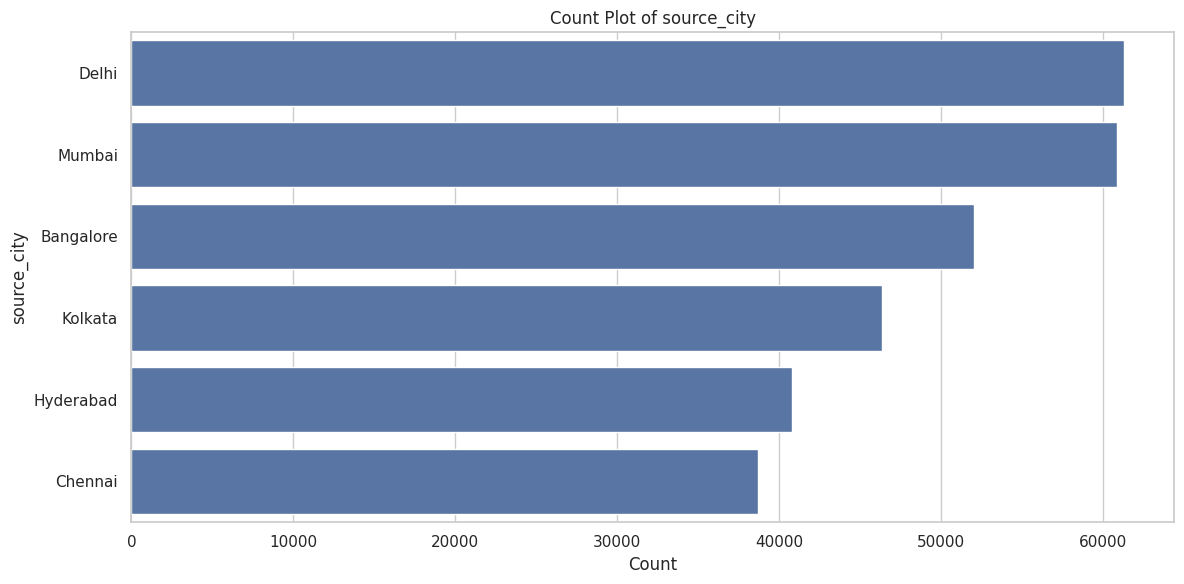

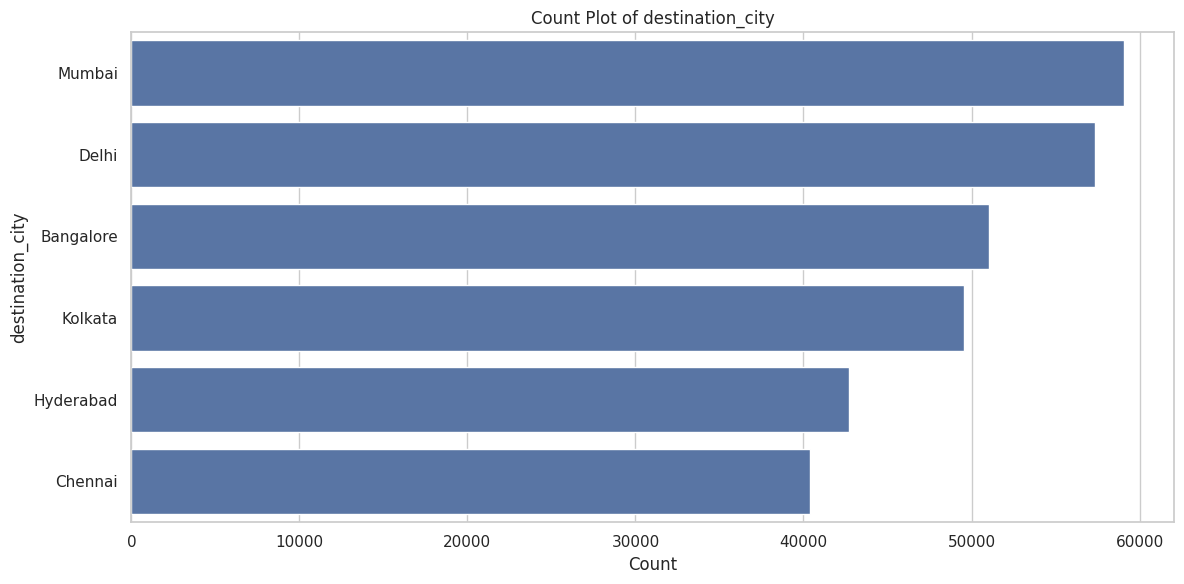

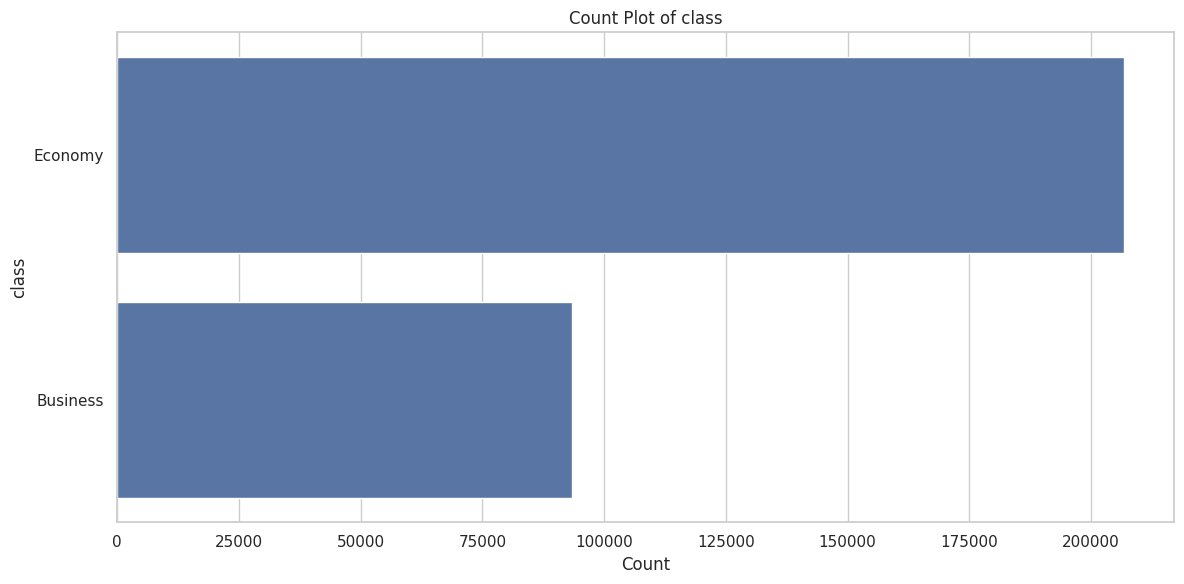

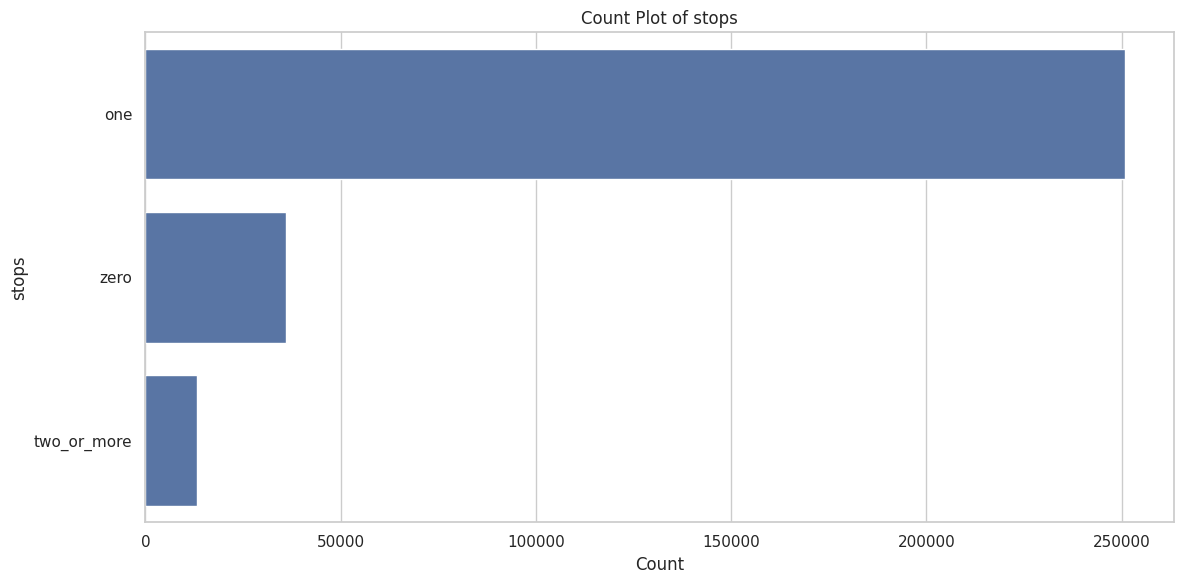

In [ ]:
# Define the categorical features
categorical_features = ['airline', 'source_city', 'destination_city', 'class', 'stops']

# Plot count plots for each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(12, 6))

    # Count plot
    sns.countplot(y=df[feature], order=df[feature].value_counts().index)
    plt.title(f'Count Plot of {feature}')
    plt.xlabel('Count')
    plt.ylabel(feature)

    plt.tight_layout()
    plt.show()

#Visualization

1. Price Distribution by Airline: Use box plots to compare the price distribution across different airlines.


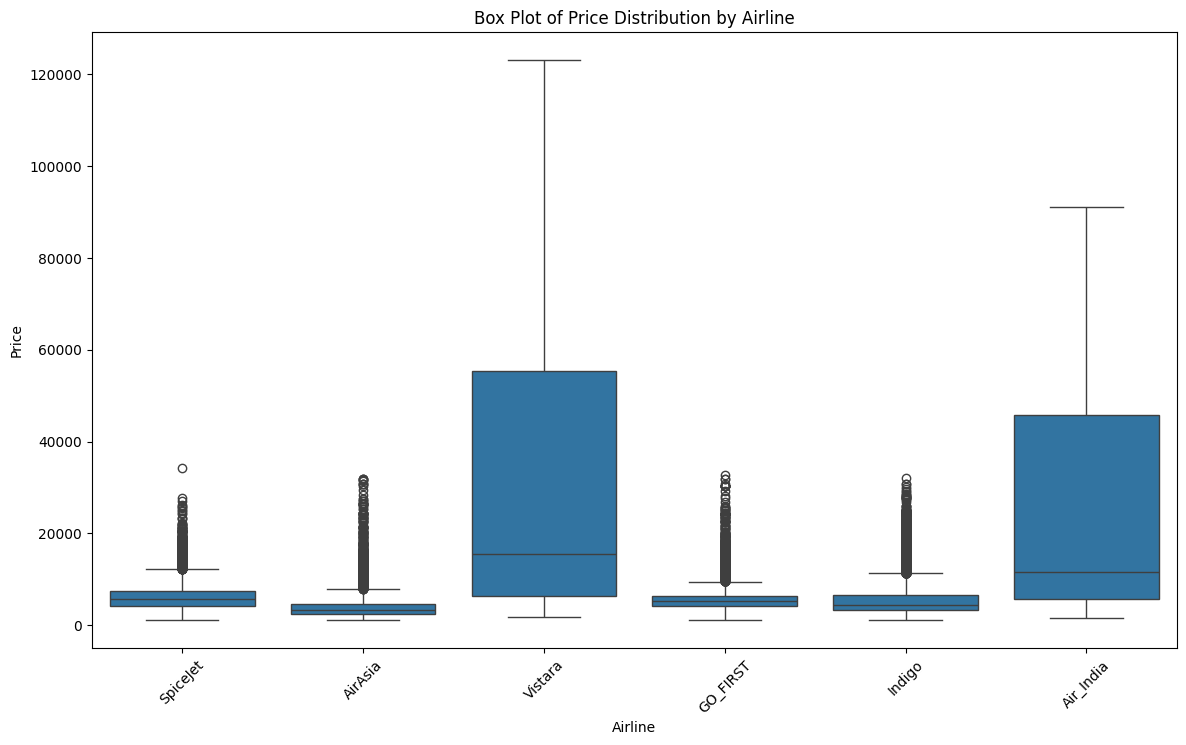

In [ ]:
# Box Plot for Price Distribution by Airline
plt.figure(figsize=(14, 8))
sns.boxplot(x='airline', y='price', data=df)
plt.title('Box Plot of Price Distribution by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

2. Duration vs. Price: Create scatter plots to see the relationship between flight duration and ticket price.



In [6]:
# Round duration to the nearest integer
df['duration_rounded'] = df['duration'].round().astype(int)

# Aggregate data by calculating the mean price for each rounded duration
aggregated_data = df.groupby('duration_rounded')['price'].mean().reset_index()

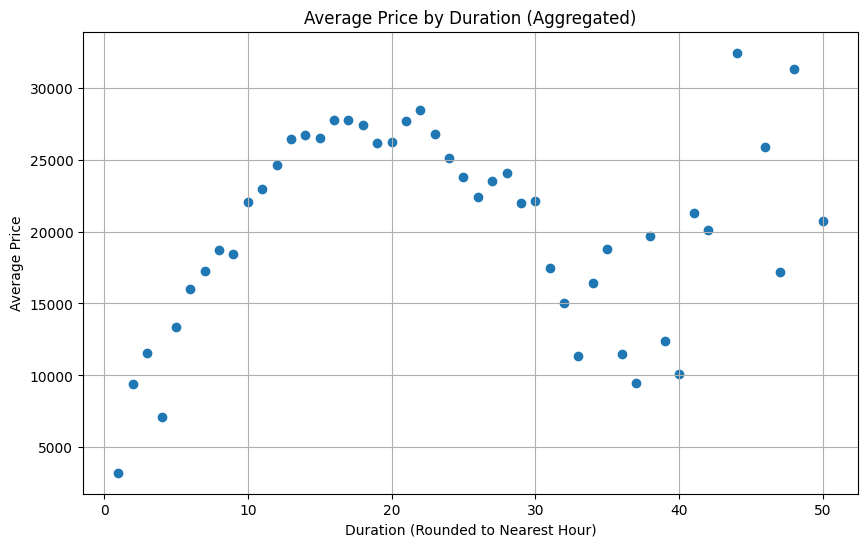

In [7]:
# Plotting the scatter plot for Duration vs. Price (aggregated data)
plt.figure(figsize=(10, 6))
plt.scatter(aggregated_data['duration_rounded'], aggregated_data['price'])
plt.title('Average Price by Duration (Aggregated)')
plt.xlabel('Duration (Rounded to Nearest Hour)')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()


3. Price vs. Days Left: Plot the ticket price against the number of days left before departure to identify any trends.

<ipython-input-14-6ecd8a021214>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='days_left', y='price', data=df, ci=None)


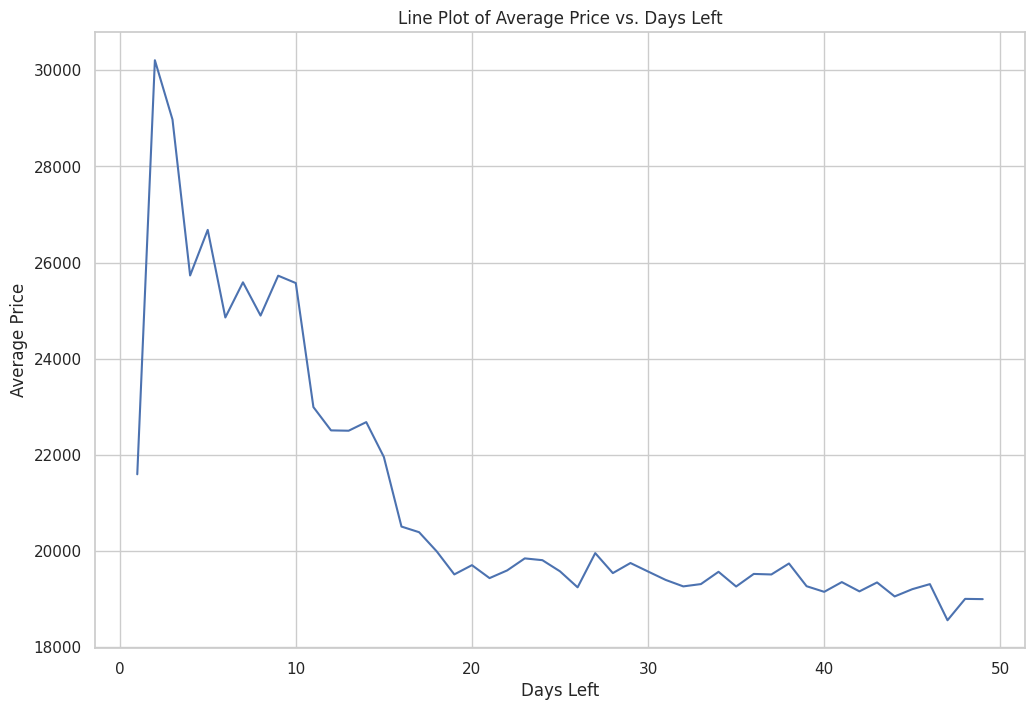

In [ ]:
# Line Plot for Average Price vs. Days Left
plt.figure(figsize=(12, 8))
sns.lineplot(x='days_left', y='price', data=df, ci=None)
plt.title('Line Plot of Average Price vs. Days Left')
plt.xlabel('Days Left')
plt.ylabel('Average Price')
plt.show()

4. Class vs. Price: Compare ticket prices across different classes (e.g., economy, business) using box plots.

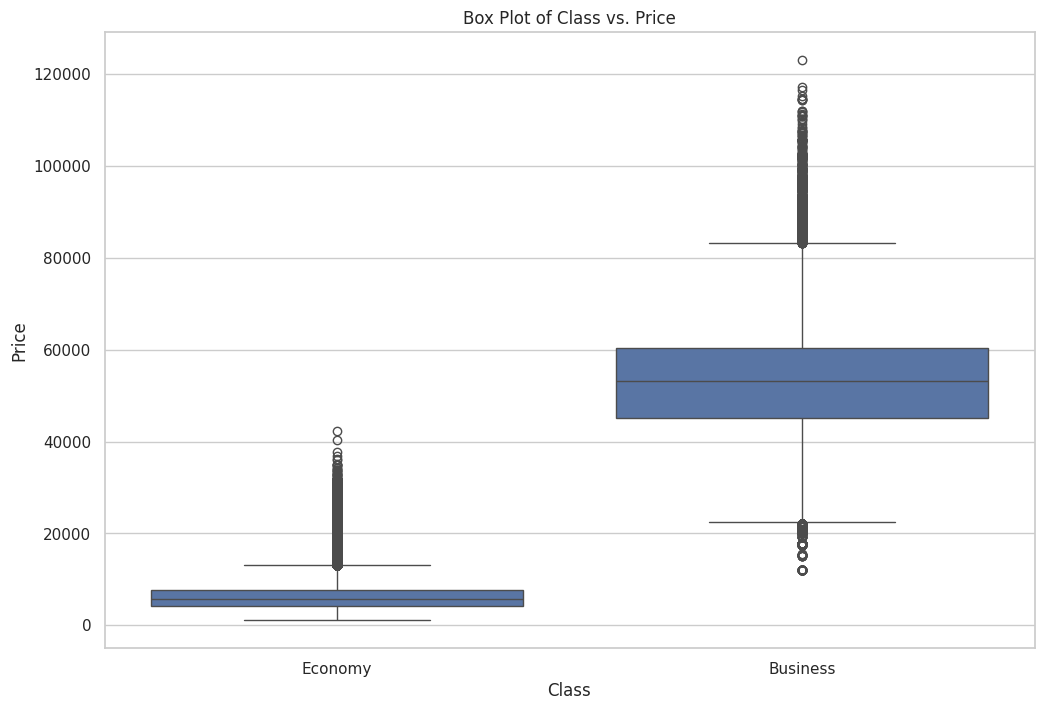

In [ ]:
# Box Plot for Class vs. Price
plt.figure(figsize=(12, 8))
sns.boxplot(x='class', y='price', data=df)
plt.title('Box Plot of Class vs. Price')
plt.xlabel('Class')
plt.ylabel('Price')
plt.show()

5. Stop Analysis: Analyze how the number of stops affects the price and duration of flights.

In [8]:
# Group by the number of stops and calculate mean duration and price
stops_summary = df.groupby('stops').agg({
    'duration': ['mean', 'median', 'std'],
    'price': ['mean', 'median', 'std']
}).reset_index()

# Flatten MultiIndex columns
stops_summary.columns = ['stops', 'duration_mean', 'duration_median', 'duration_std', 'price_mean', 'price_median', 'price_std']

# Display the summary statistics
print(stops_summary)


         stops  duration_mean  duration_median  duration_std    price_mean  \
0          one      13.496514            12.25      6.510456  22900.992482   
1  two_or_more      15.317141            12.67      7.392067  14113.450775   
2         zero       2.191324             2.25      0.500995   9375.938535   

   price_median     price_std  
0        7959.0  23626.066584  
1        8307.0  17664.332033  
2        4499.0  10623.008293  


<ipython-input-9-89f8b7fe1ba2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='stops', y='duration_mean', data=stops_summary, palette='viridis')


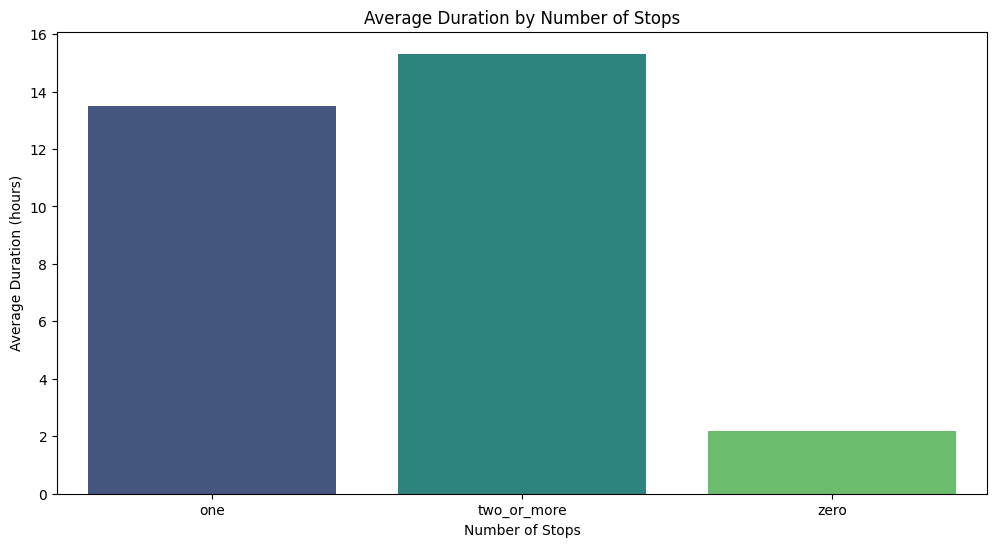

<ipython-input-9-89f8b7fe1ba2>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='stops', y='price_mean', data=stops_summary, palette='viridis')


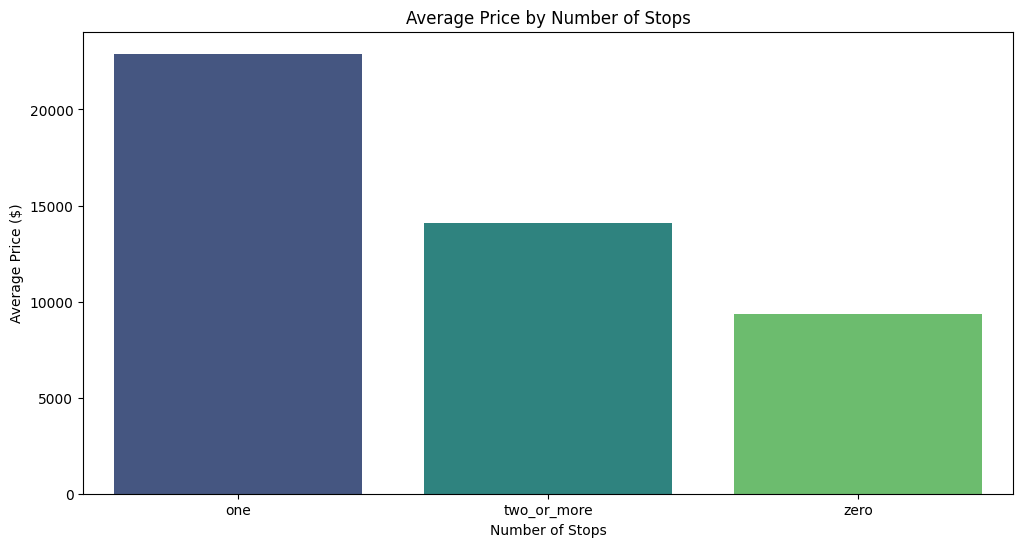

In [9]:
# Bar plot for mean duration by stops
plt.figure(figsize=(12, 6))
sns.barplot(x='stops', y='duration_mean', data=stops_summary, palette='viridis')
plt.title('Average Duration by Number of Stops')
plt.xlabel('Number of Stops')
plt.ylabel('Average Duration (hours)')
plt.show()

# Bar plot for mean price by stops
plt.figure(figsize=(12, 6))
sns.barplot(x='stops', y='price_mean', data=stops_summary, palette='viridis')
plt.title('Average Price by Number of Stops')
plt.xlabel('Number of Stops')
plt.ylabel('Average Price ($)')
plt.show()

#Time-Based Analysis

1. Price Fluctuation: Analyze how prices change based on departure_time and arrival_time.

In [ ]:
df_price_fluctuation = df.copy()

In [ ]:
# Ensure departure_time and arrival_time are treated as categorical data
df_price_fluctuation['departure_time'] = df_price_fluctuation['departure_time'].astype('category')
df_price_fluctuation['arrival_time'] = df_price_fluctuation['arrival_time'].astype('category')

# Aggregate data to get average price for each departure_time and arrival_time
avg_price_departure = df_price_fluctuation.groupby('departure_time')['price'].mean().reset_index()
avg_price_arrival = df_price_fluctuation.groupby('arrival_time')['price'].mean().reset_index()

<ipython-input-8-9c1b66b9e723>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='departure_time', y='price', data=avg_price_departure, palette='viridis')


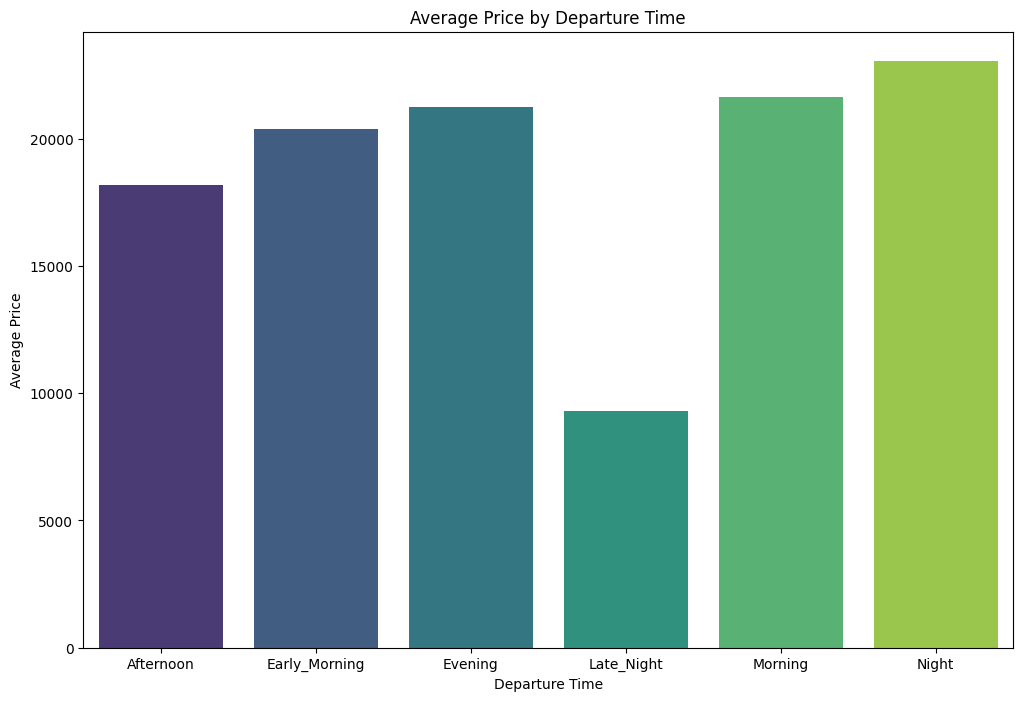

In [ ]:
# Bar Plot for Average Price by Departure Time
plt.figure(figsize=(12, 8))
sns.barplot(x='departure_time', y='price', data=avg_price_departure, palette='viridis')
plt.title('Average Price by Departure Time')
plt.xlabel('Departure Time')
plt.ylabel('Average Price')
plt.show()

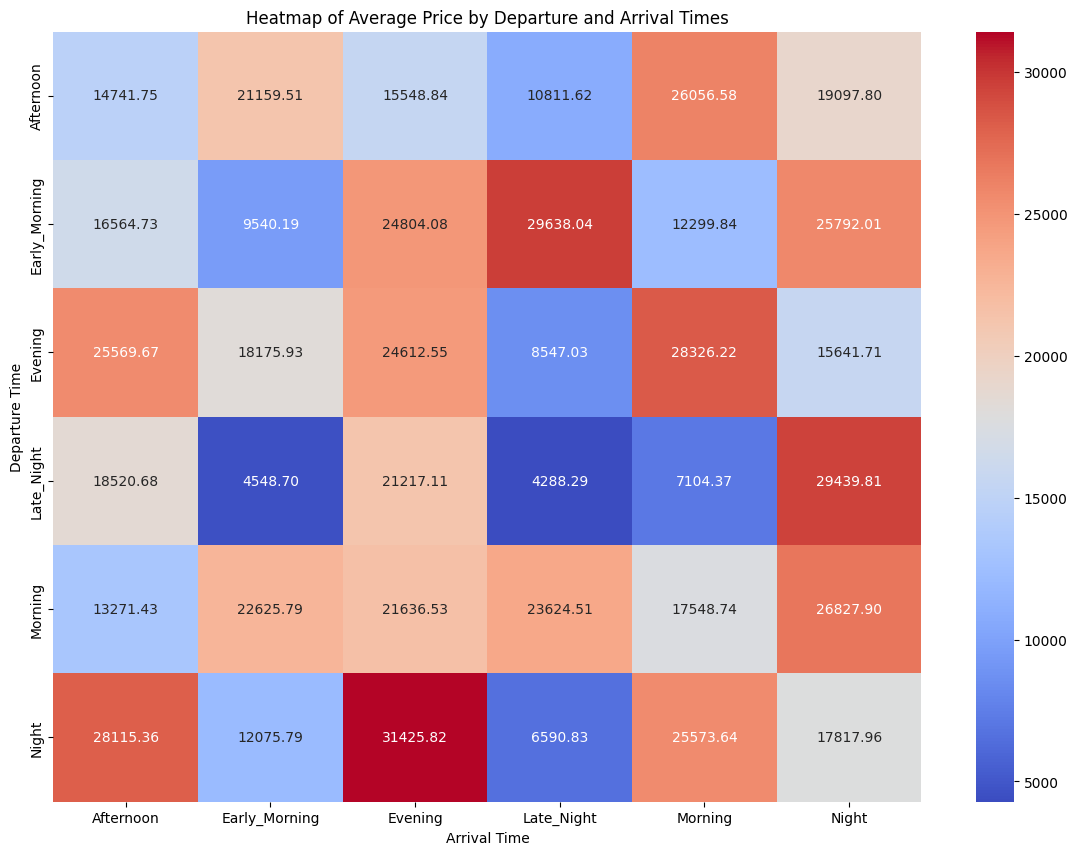

In [ ]:
# Create a pivot table for heatmap
heatmap_data = df.pivot_table(index='departure_time', columns='arrival_time', values='price', aggfunc='mean')

# Heatmap for Average Price by Departure and Arrival Times
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Heatmap of Average Price by Departure and Arrival Times')
plt.xlabel('Arrival Time')
plt.ylabel('Departure Time')
plt.show()

# Correlation Analysis

1. Correlation Matrix: Compute the correlation matrix to see the relationships between numerical features.

In [ ]:
# Select numerical features
numerical_features = df[['duration', 'days_left', 'price']]

# Compute the correlation matrix
correlation_matrix = numerical_features.corr()

# Display the correlation matrix
print(correlation_matrix)

           duration  days_left     price
duration   1.000000  -0.039157  0.204222
days_left -0.039157   1.000000 -0.091949
price      0.204222  -0.091949  1.000000


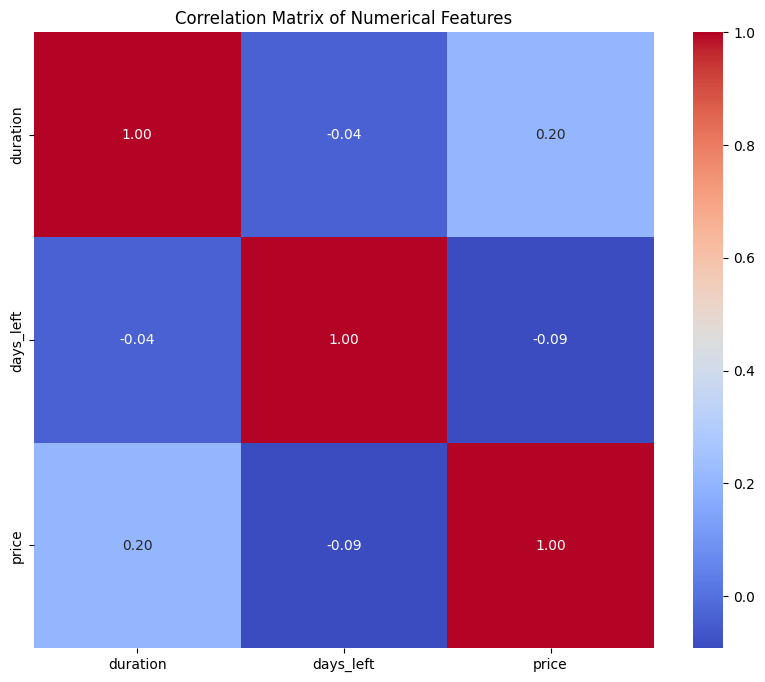

In [ ]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

#Route Analyses

1. Route Popularity: Determine the most popular routes by counting the number of bookings between each source_city and destination_city.

In [ ]:
# Group by source_city and destination_city and count the number of bookings
route_counts = df.groupby(['source_city', 'destination_city']).size().reset_index(name='counts')

# Sort the routes by number of bookings in descending order
route_counts = route_counts.sort_values(by='counts', ascending=False)

# Display the top 10 most popular routes
print(route_counts.head(10))

   source_city destination_city  counts
14       Delhi           Mumbai   15289
27      Mumbai            Delhi   14809
10       Delhi        Bangalore   14012
1    Bangalore            Delhi   13756
4    Bangalore           Mumbai   12939
25      Mumbai        Bangalore   12885
29      Mumbai          Kolkata   12602
13       Delhi          Kolkata   11934
24     Kolkata           Mumbai   11467
11       Delhi          Chennai   10780


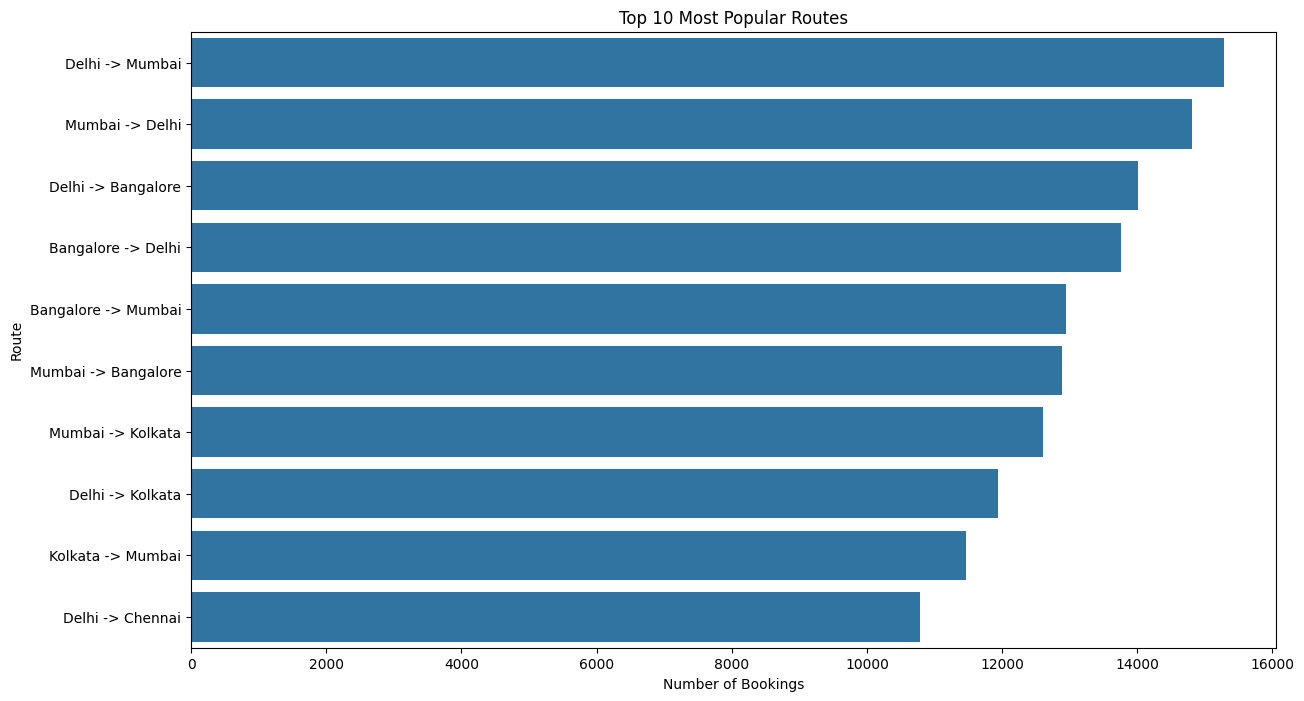

In [ ]:
# Visualize the top 10 most popular routes
top_routes = route_counts.head(10)

plt.figure(figsize=(14, 8))
sns.barplot(data=top_routes, x='counts', y=top_routes.apply(lambda x: f"{x['source_city']} -> {x['destination_city']}", axis=1))
plt.title('Top 10 Most Popular Routes')
plt.xlabel('Number of Bookings')
plt.ylabel('Route')
plt.show()